# Homework 1 : CUAHSI VU : Snow Hydrology

## C. Setup

With all the new skills in using Jupyter notebook, SUMMA, pySUMMA, etc., it's time to get away from examples and run your own exercises for Homework 1. This notebook will be brief. You will download and install the data sets that you will need to run the exercises. There is no point in downloading the same data over and over again, which is why we will do this once as part of this notebook. Once the data is installed you can move on to the next notebook. All three exercises in Homework 1 will use the same data set for the simulations.

As before, remember that you want to save your notebooks in a place other than the `examples` directory tree, because files you save there may be deleted and overwritten the next time you start your virtual machine. Save your files somewhere in the `work` directory tree: `work/homework_1` would be a great place for them. So click on "_File --> Save Notebook As..._" and save this notebook as `work/homework_1/homework_1_C_setup.ipynb` before you continue. If things go hopelessly wrong, you can always start over again with the original notebook in your `examples` directory tree.

Also, if things go wrong and you overwrite or lose your data you can rerun this setup notebook to re-install the data sets you need for the homework.

## Install the homework 1 setup from HydroShare

The HydroShare resource we will use for this homework is https://www.hydroshare.org/resource/363296896e9d48d9b464d766fcd3073a/. This is a public resource owned by Andrew Bennett, a graduate student at the University of Washington, who has been helping to figure the homework assignments so they can be run in this virtual machine.

As before, we define the `resource_id`, a place to store the resource after it is downloaded (`save_filepath`), and download the resource. Since HydroShare zips the resource file, we unzip it when we get it.

In [1]:
from hs_restclient import HydroShare
resource_id = '363296896e9d48d9b464d766fcd3073a'
save_filepath = '/home/jovyan/work'
hs = HydroShare()
hs.getResource(resource_id, destination=save_filepath, unzip=True)

In the file manager on the left, you will now see an entry for a directory with the same name as the `resource_id`. The file that is part of the resource is a compressed tar file (`reynolds.tar.gz`), which we need to uncompress and extract before we can use the contents. We can use a python package (`shutil`) to accomplish this. The directory structure is a bit obscure, but after you run the following commands you should be all set up.

In [3]:
import os
import shutil
resource_name = 'reynolds.tar.gz'
testcase_filepath = (save_filepath + '/' + resource_id + '/' 
                     + resource_id + '/data/contents/' + resource_name)
shutil.unpack_archive(testcase_filepath, extract_dir=os.path.dirname(testcase_filepath))

Now let's just make sure it all works. We'll create a simulation object and will run a quick test simulation with the configuration that you now have.

In [4]:
from pysumma.Simulation import Simulation
case_path = '/home/jovyan/work/{}/{}/data/contents/reynolds'.format(resource_id, resource_id)
filemanager_path = case_path+'/settings/snow_fileManager_template.txt'
summa_code_path = '/opt/summa'
S = Simulation(case_data=filemanager_path, summa_code=summa_code_path) # ignore message that is printed

ModelOuput master file filepath: /opt/summa/build/source/dshare/var_lookup.f90


Let's run the test case. This one will take a bit longer than the previous simulations and may take about a minute to run. If everything works as it should, then the final line will be `FORTRAN STOP: finished simulation successfully.`.

In [5]:
results_test, outfile_test = S.execute(run_suffix="test", run_option = 'local')

file_suffix is 'test'.
file_master is '/home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_fileManager_template.txt'.
start at 08:06:37
Name of Model Output control file: /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zOutputControl.txt
decisions file =  /home/jovyan/work/363296896e9d48d9b464d766fcd3073a/363296896e9d48d9b464d766fcd3073a/data/contents/reynolds/settings/snow_zDecisions.txt
   1 simulStart: 1999-07-01 00:00
   2 simulFinsh: 2003-09-30 23:00
   3 soilCatTbl: ROSETTA
   4 vegeParTbl: USGS
   5 soilStress: NoahType
   6 stomResist: BallBerry
   7 num_method: itertive
   8 fDerivMeth: analytic
   9 LAI_method: monTable
  10 f_Richards: mixdform
  11 groundwatr: noXplict
  12 hc_profile: constant
  13 bcUpprTdyn: nrg_flux
  14 bcLowrTdyn: zeroFlux
  15 bcUpprSoiH: liq_flux
  16 bcLowrSoiH: drainage
  17 veg_traits: CM_QJRMS1988
  18 can

And a quick plot of the snow water equivalent time series to make sure we get output that is meaningful.

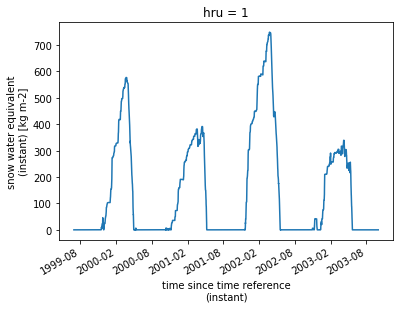

In [6]:
%matplotlib inline
results_test.scalarSWE.isel(hru=0).plot() # ignore the warning

## On to the next step

You're all set up for the homework assignment and it's your turn to write some python code to manipulate the simulations. Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. Then open the next notebook: `/home/jovyan/examples/homework_1/homework_1_D_example.ipynb`.